# Audio Visualization

First at all, we make sure that the requiremens are satisfied

In [1]:
# Install requirements
!pip install pydub
!pip install librosa

We import the different libraries that we will use in this notebook

In [2]:
# Imports
import os.path
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import warnings
from pydub import AudioSegment
# Don't show warnings
warnings.filterwarnings('ignore')

Some initializations:
- What is the path of the audios
- Default slug for the audios that we will show
- Different audio types
- Default audio type
- Function to get the path for an audio

In [3]:
# Path where audios (mp3 format) are located
audio_path = './audios'
# Default audio slug, we will work with audios of this folder
audio_slug = '0c00ybTdnIRUTXeg20bZjJOzhKv1'
# The different audios that we can find at the folders
audio_types = [
    'breathing-deep', 
    'breathing-shallow', 
    'cough-heavy', 
    'cough-shallow',
    'counting-fast', 
    'counting-normal',
    'vowel-a',
    'vowel-e',
    'vowel-o'
]
# Default audio type
# when we want to focus only in one audio, this will be the choosen one
default_audio_type = 'cough-heavy'
# Function to get the path of an mp3 file based on his audio type
# If the audio type is not provided, then default_audio_type will be used
def get_file_path(audio_type = default_audio_type):
    return os.path.join(audio_path, audio_slug, audio_type + '.mp3')

For the current slug, we iterate each audio type getting the file name, and showing the frame rate and the duration (in seconds)

In [8]:
for audio_type in audio_types:
    file_name = get_file_path(audio_type)
    print(file_name)
    song = AudioSegment.from_mp3(file_name)
    print(f'Frame rate: {song.frame_rate}')
    print(f'Duration: {song.duration_seconds}')

./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\breathing-deep.mp3
Frame rate: 44100
Duration: 15.696689342403628
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\breathing-shallow.mp3
Frame rate: 44100
Duration: 7.337505668934241
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\cough-heavy.mp3
Frame rate: 44100
Duration: 6.965986394557823
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\cough-shallow.mp3
Frame rate: 44100
Duration: 6.873106575963718
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\counting-fast.mp3
Frame rate: 44100
Duration: 3.900952380952381
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\counting-normal.mp3
Frame rate: 44100
Duration: 11.052698412698414
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\vowel-a.mp3
Frame rate: 44100
Duration: 3.8080725623582765
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\vowel-e.mp3
Frame rate: 44100
Duration: 4.272471655328798
./audios\0c00ybTdnIRUTXeg20bZjJOzhKv1\vowel-o.mp3
Frame rate: 44100
Duration: 7.894784580498866


For the current slug, we visualize the content

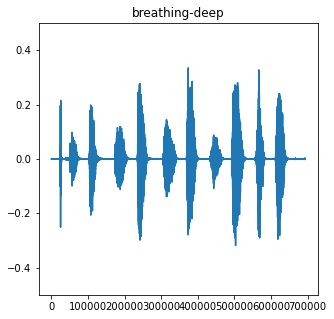

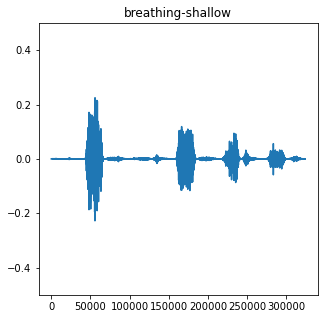

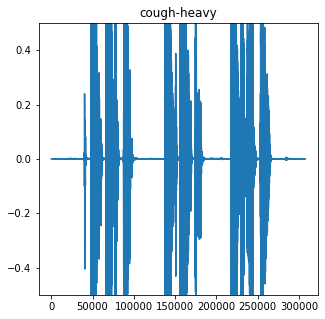

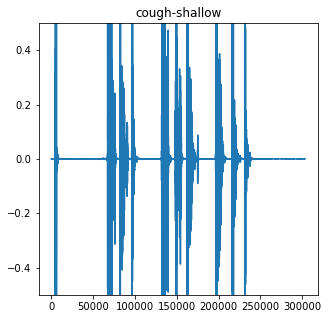

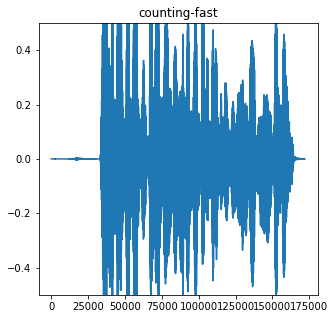

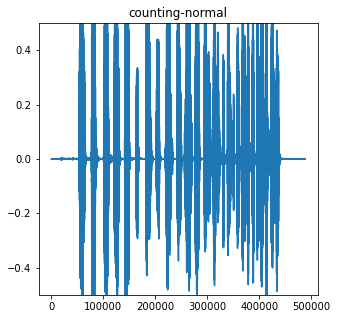

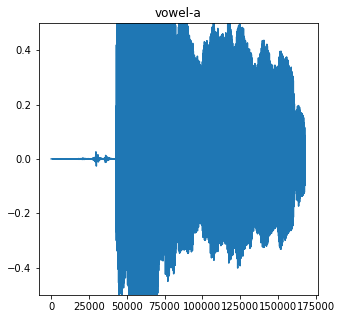

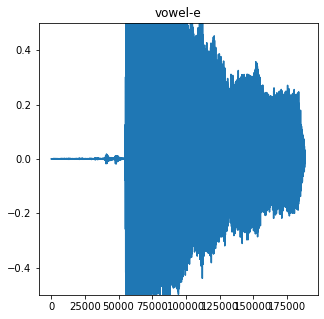

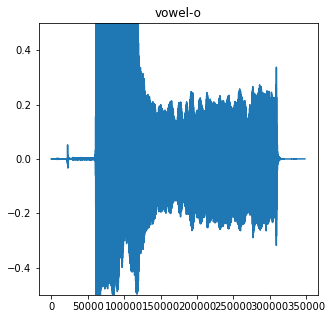

In [9]:
for audio_type in audio_types:
    file_name = get_file_path(audio_type)
    audio = AudioSegment.from_mp3(file_name)
    y, sr = librosa.core.load(file_name, sr = audio.frame_rate)
    plt.figure(figsize=[5, 5])
    plt.title(audio_type)
    plt.plot(y)
    plt.ylim([-0.5, 0.5])
    plt.show()

## Spectrum

Let's calculate spectrum for one of the audios

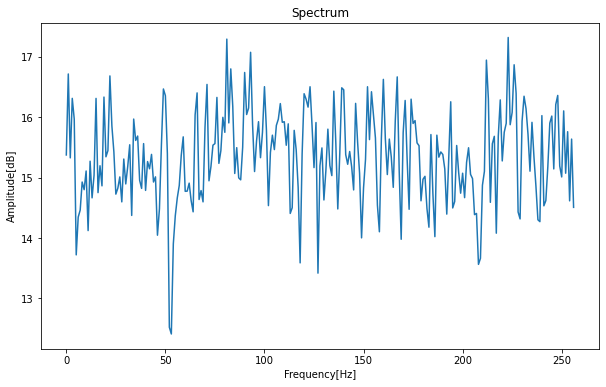

In [6]:
# Get the file path for the default audio. 
# The choosen one is cough_heavy of the first audio slug
default_file_path = get_file_path()
# Get information about the audio, we need the sample rate
song = AudioSegment.from_mp3(default_file_path)
sample_rate = song.frame_rate
# See documentation of librosa here: 
# https://librosa.org/doc/0.8.0/generated/librosa.stft.html
# "in speech processing, the recommended value is 512, 
# corresponding to 23 milliseconds at a sample rate of 22050 Hz"
n_fft = 512

# Load the data from the audio as np array of int16
song_data = np.fromfile(default_file_path, dtype=np.int16)
# Now we have the data as array of -32768 up to 32767
# np.iinfo(np.int16) returns the min and max value for int16 type
# First at all we replace all -32768 with -32767
song_data[song_data < -np.iinfo(np.int16).max] = -np.iinfo(np.int16).max
# Now all the data in the array is between -32767 and +32767
# If we convert to float and divide by +32767 we obtain a normalized array
# of values between -1 and 1
song_data = song_data.astype(np.float) / np.iinfo(np.int16).max
# We calculate the Short-Time Fourier transform (STFT)
min_position = sample_rate // 4
max_position = sample_rate // 4 * 2
song_data_stft = librosa.stft(song_data[min_position:max_position], n_fft=n_fft)
# From the STFT we calculate the amplitude
song_data_amplitude = np.mean(librosa.amplitude_to_db(np.abs(song_data_stft)), axis=1)
# Let's plot that amplitude vs frequency
plt.figure(figsize=[10,6])
plt.title('Spectrum')
plt.xlabel("Frequency[Hz]")
plt.ylabel("Amplitude[dB]")
plt.plot(song_data_amplitude)
plt.show()

Now let's calculate the Spectrogram using librosa

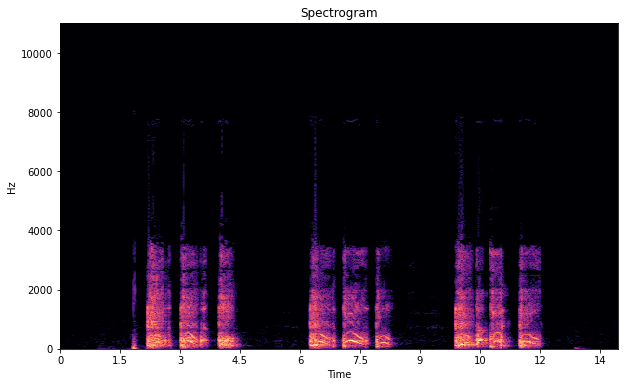

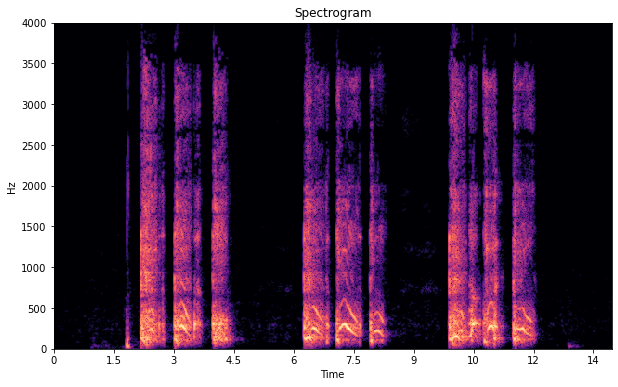

In [25]:
def plot_spectrogram(file_path, start_hz = None, end_hz = None):
    # Get the sample rate of the audio
    audio = AudioSegment.from_mp3(file_path)
    sample_rate = song.frame_rate
    # Load the current audio with librosa
    y, sr = librosa.core.load(default_file_path, sr=sample_rate)
    # Calculate the Short-Time Fourier transform for the current audio 
    stft = librosa.stft(y)
    # We prepare the plot
    plt.figure(figsize=[10,6])
    plt.title('Spectrogram')
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='linear', x_axis='time')
    # If start_hz and end_hz are defined, set the ylim
    if ((start_hz != None) & (end_hz != None)):
        plt.ylim(start_hz, end_hz)

    plt.show() 
# Full spectrogram with all Hz range
plot_spectrogram(default_file_path)
# Spectrogram focused on 0 to 4000 Hz
plot_spectrogram(default_file_path, 0, 4000)


Get the Mel Spectrogram for 10 and 40 mels

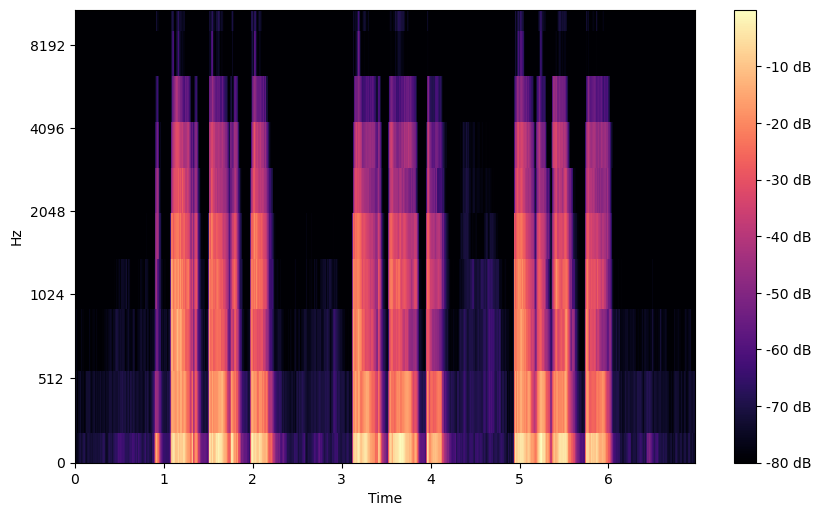

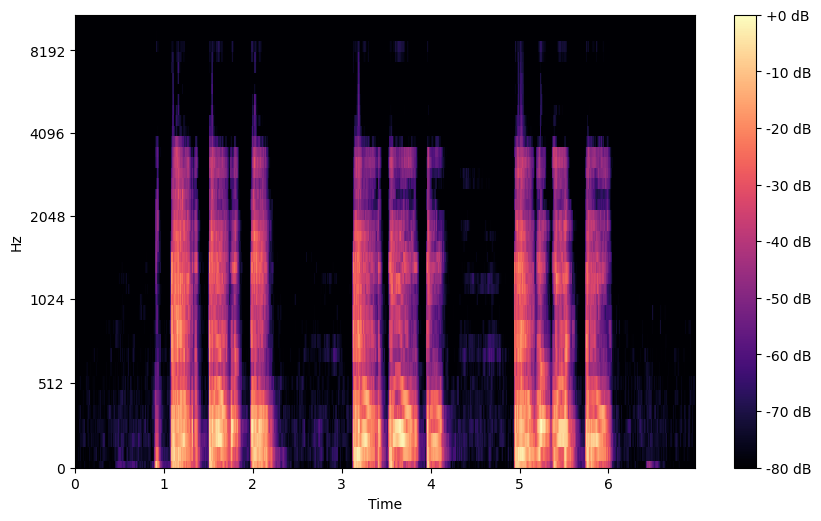

In [41]:
def plot_spectrogram_mel(file_path, mels = 40, show_info = True):
    # Get the sample rate of the audio
    audio = AudioSegment.from_mp3(file_path)
    sample_rate = song.frame_rate
    # Load the current audio with librosa
    y, sr = librosa.load(default_file_path, sr=sample_rate)
    input_nfft = int(round(sample_rate * 0.025))
    input_stride = int(round(sample_rate * 0.010))
    mel = librosa.feature.melspectrogram(y = y, n_mels = mels, n_fft = input_nfft, hop_length = input_stride)
    plt.figure(figsize=[10,6], dpi = 100)
    librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    if (show_info):
        plt.colorbar(format='%+2.0f dB')
    else:
        plt.axis('off')
    plt.show()
    
    
plot_spectrogram_mel(default_file_path, 10)
plot_spectrogram_mel(default_file_path, 40)

